Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 4 </h2>
    <h1> El puesto de DATiles de Viocente </h1>
    <p>
        Profesor Vicente Domínguez<br>
        Primer semestre 2022<br>    
        Fecha de entrega: Viernes 10 de Junio a las 22:00hrs.
    </p>
    <br>
</center>

<br>

---

Luego de estar aprendiendo técnicas para trading de cryptomonedas y poder finalmente llegar a alcanzar la libertad financiera, descubres que PCA se inventó el 1901. Supones tienen que existir algoritmos mejores, por lo que consultas al gurú Viocente. Él te dice que para poder superar cualquier bot de trading, lo único que necesitas es ser un experto en clustering y reducción de dimensionalidad.

Por esto decides tomar el dataset de las frutas más _Data Mining_ que existen, [los Dátiles](https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets), extraídos del baúl de Viocente, para probar finalmente cuál es el MEJOR algoritmo para reducir la dimensionalidad y para realizar unos lindos clusters. 

# Parte 1: Carga y preprocesamiento (0.5 puntos)
Cargue los datos y librerías, y realice preprocesamiento en caso de necesitarlo.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
import umap

In [2]:
df = pd.read_excel('data/Date_Fruit_Datasets.xlsx')

In [3]:
X = df.drop('Class', axis=1)
Y = df.Class

In [4]:
Y.unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

# Parte 2: Reducción de dimensionalidades (1 punto)

Para esta parte deben reducir la dimensionalidad de los datos utilizando los métodos de: PCA, t-SNE y UMAP. 
Para esto puede utilizar las librerías que estime conveniente. 

Reduzca los datos a dos dimensiones y grafiquelos para cada caso. 

Importante: Debe buscar los hiperparámetros que mejor separen los datos según los conocimientos que ya posee. (pruebe almenos 5)

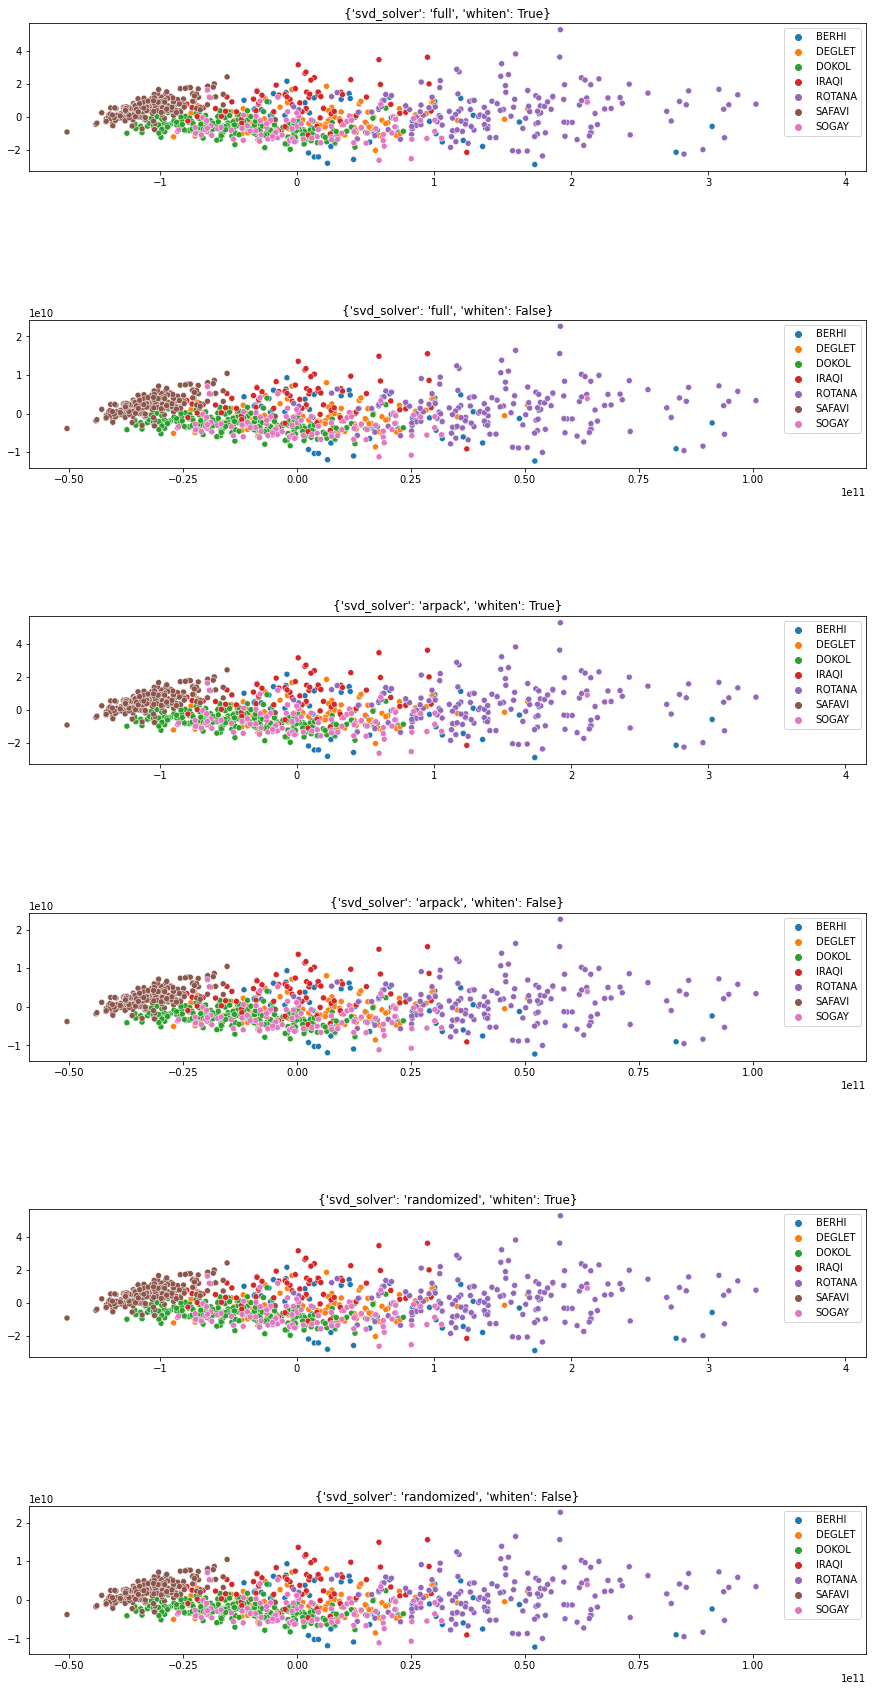

In [30]:
# PCA

params = {'svd_solver':['full', 'arpack', 'randomized'], 'whiten':[True, False]}
fig, ax = plt.subplots(6,1,figsize=(15,30))
plt.subplots_adjust(hspace = 1)
i=0
for solver in params['svd_solver']:
    for whiten in params['whiten']:
        kwargs = {'svd_solver': solver, 'whiten': whiten}
        pca    = PCA(n_components=2, **kwargs)

        data   = pca.fit_transform(X)
        
        fig = sns.scatterplot(x=data[:,0], y=data[:,1], hue=Y.values, ax=ax[i])
        ax[i].set_title(f'{kwargs}')
        i += 1
        

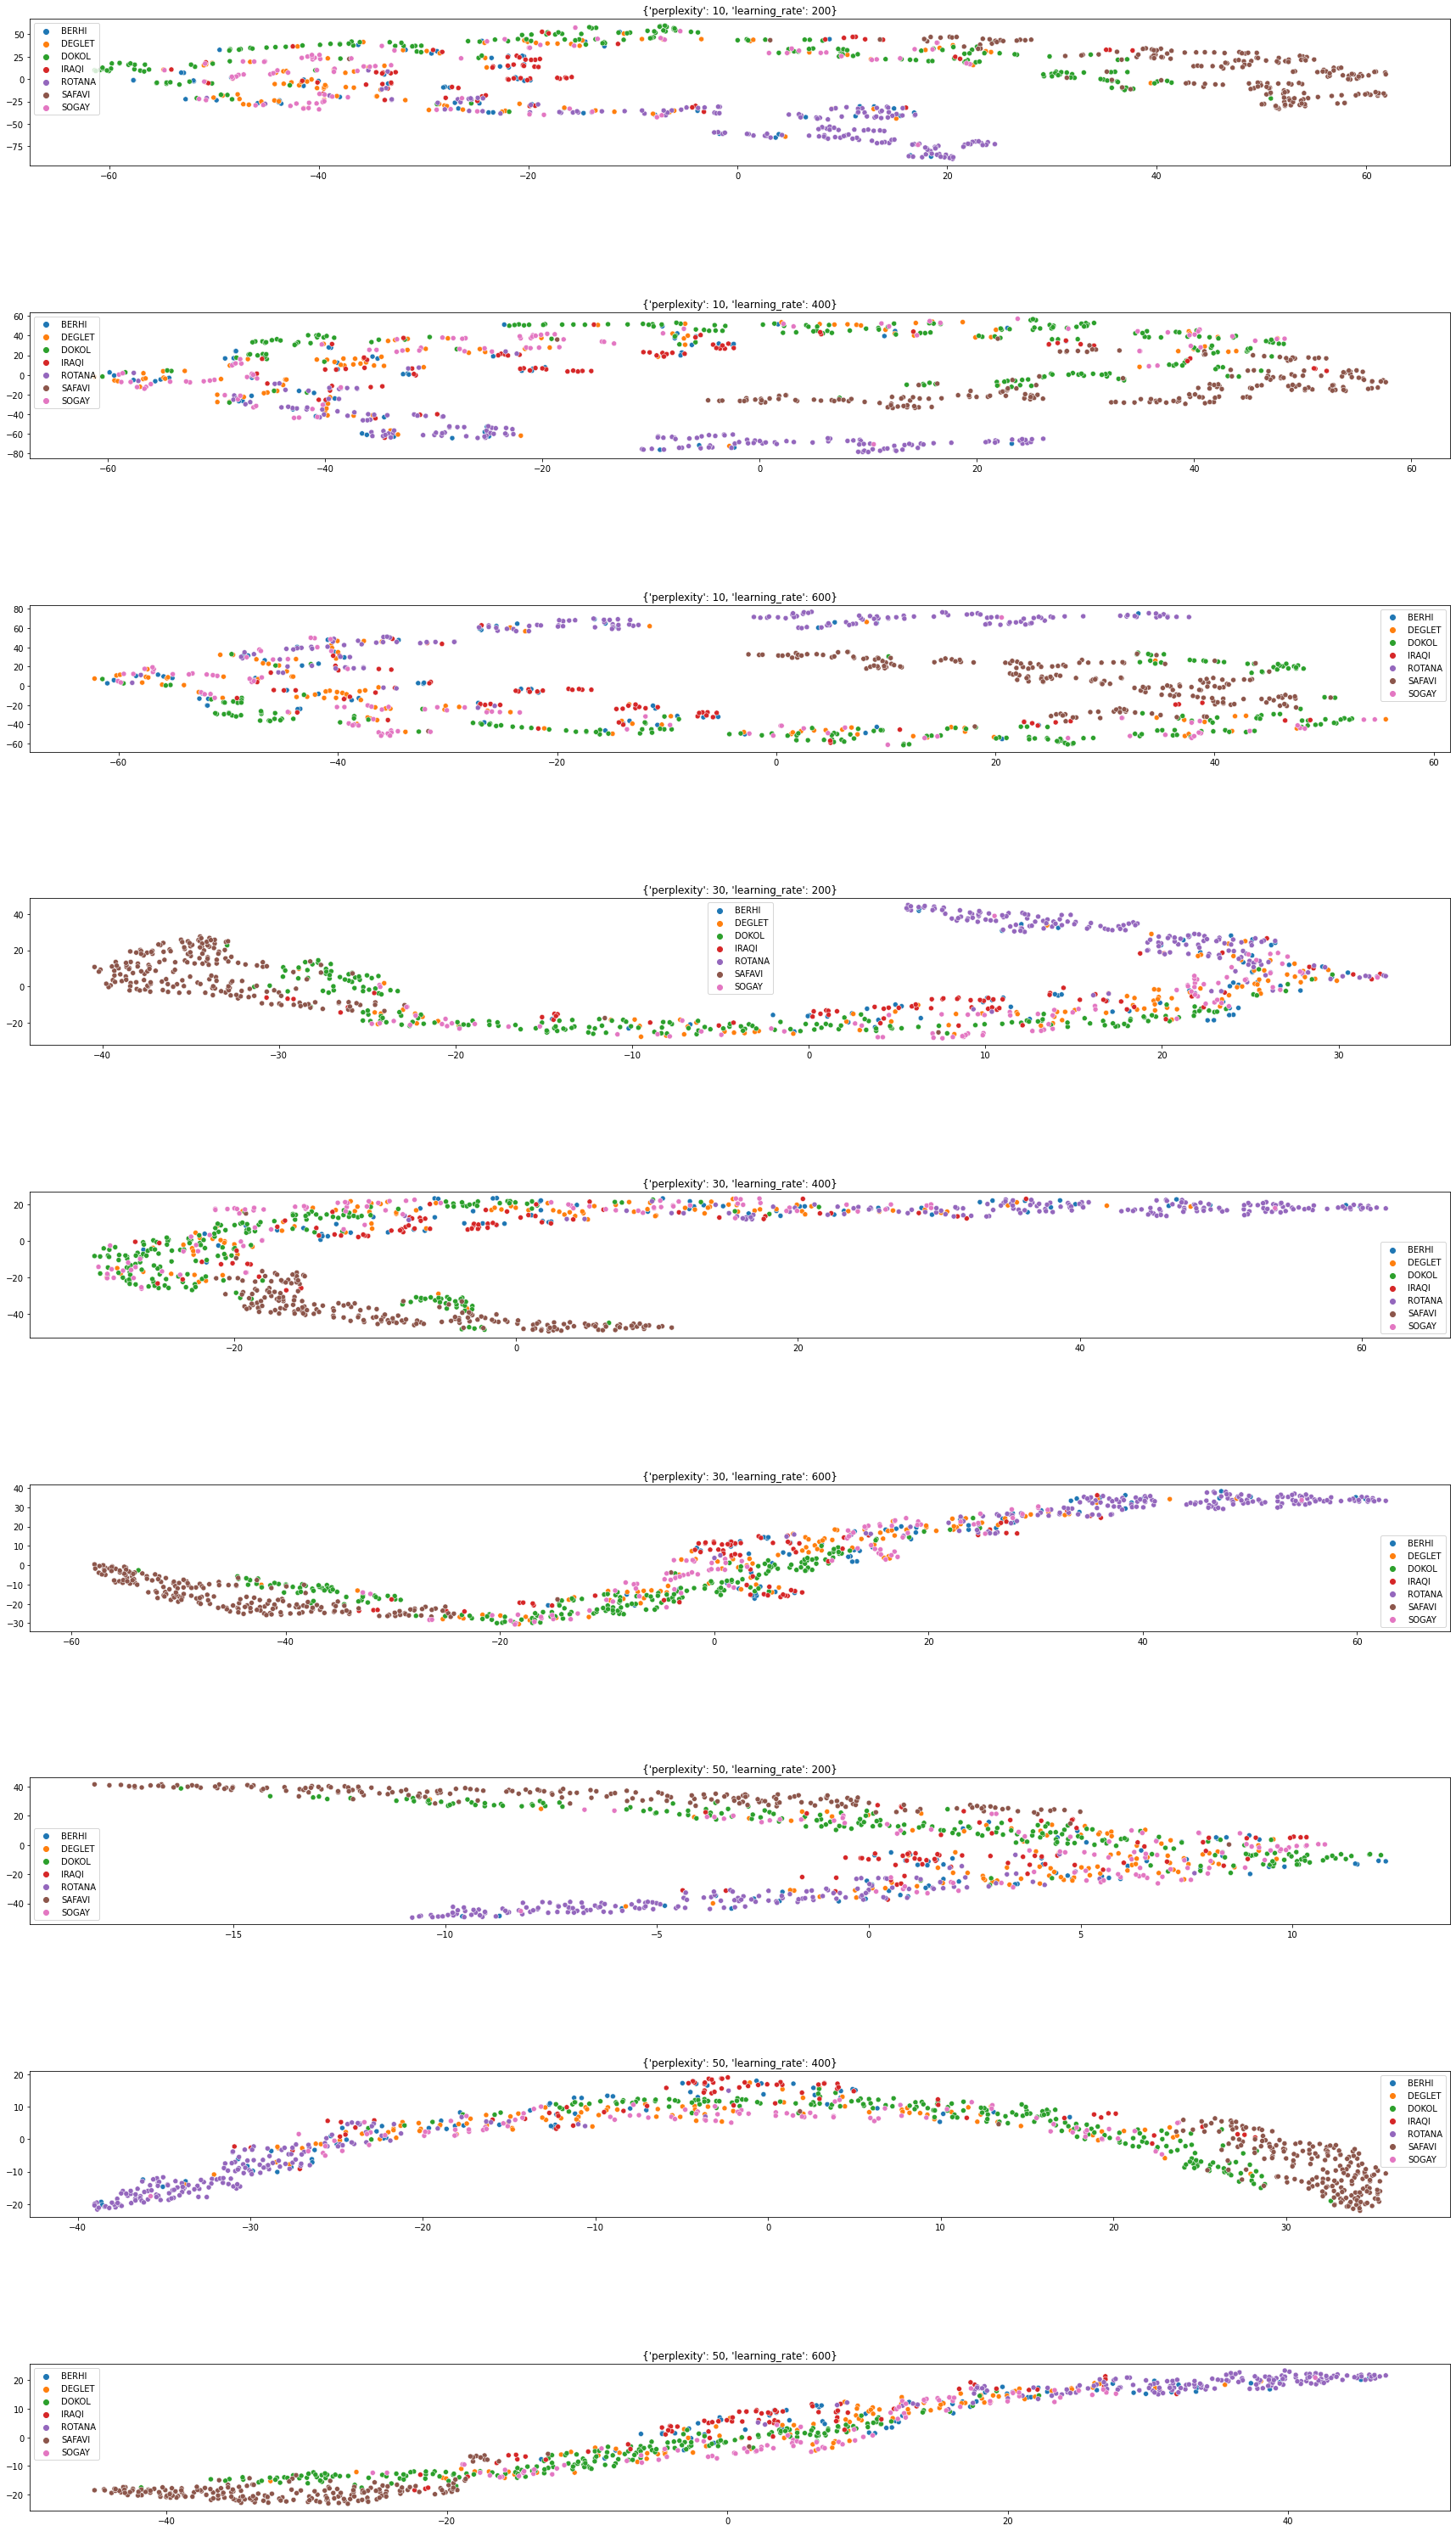

In [32]:
# t-SNE

params = {'perplexity':[x for x in range(10,60,20)], 'learning_rate':[x for x in range(200,800,200)]}
altura = len(params['perplexity'] * len(params['learning_rate']))
fig, ax = plt.subplots(altura,1,figsize=(30,6*altura))
plt.subplots_adjust(hspace = 1)
i=0
for perplexity in params['perplexity']:
    for lr in params['learning_rate']:

        kwargs = {'perplexity': perplexity, 'learning_rate': lr}
        tsne   = TSNE(n_components=2, init='random', **kwargs)

        data   = tsne.fit_transform(X)
       
        fig = sns.scatterplot(x=data[:,0], y=data[:,1], hue=Y.values, ax=ax[i])
        ax[i].set_title(f'{kwargs}')
        i += 1


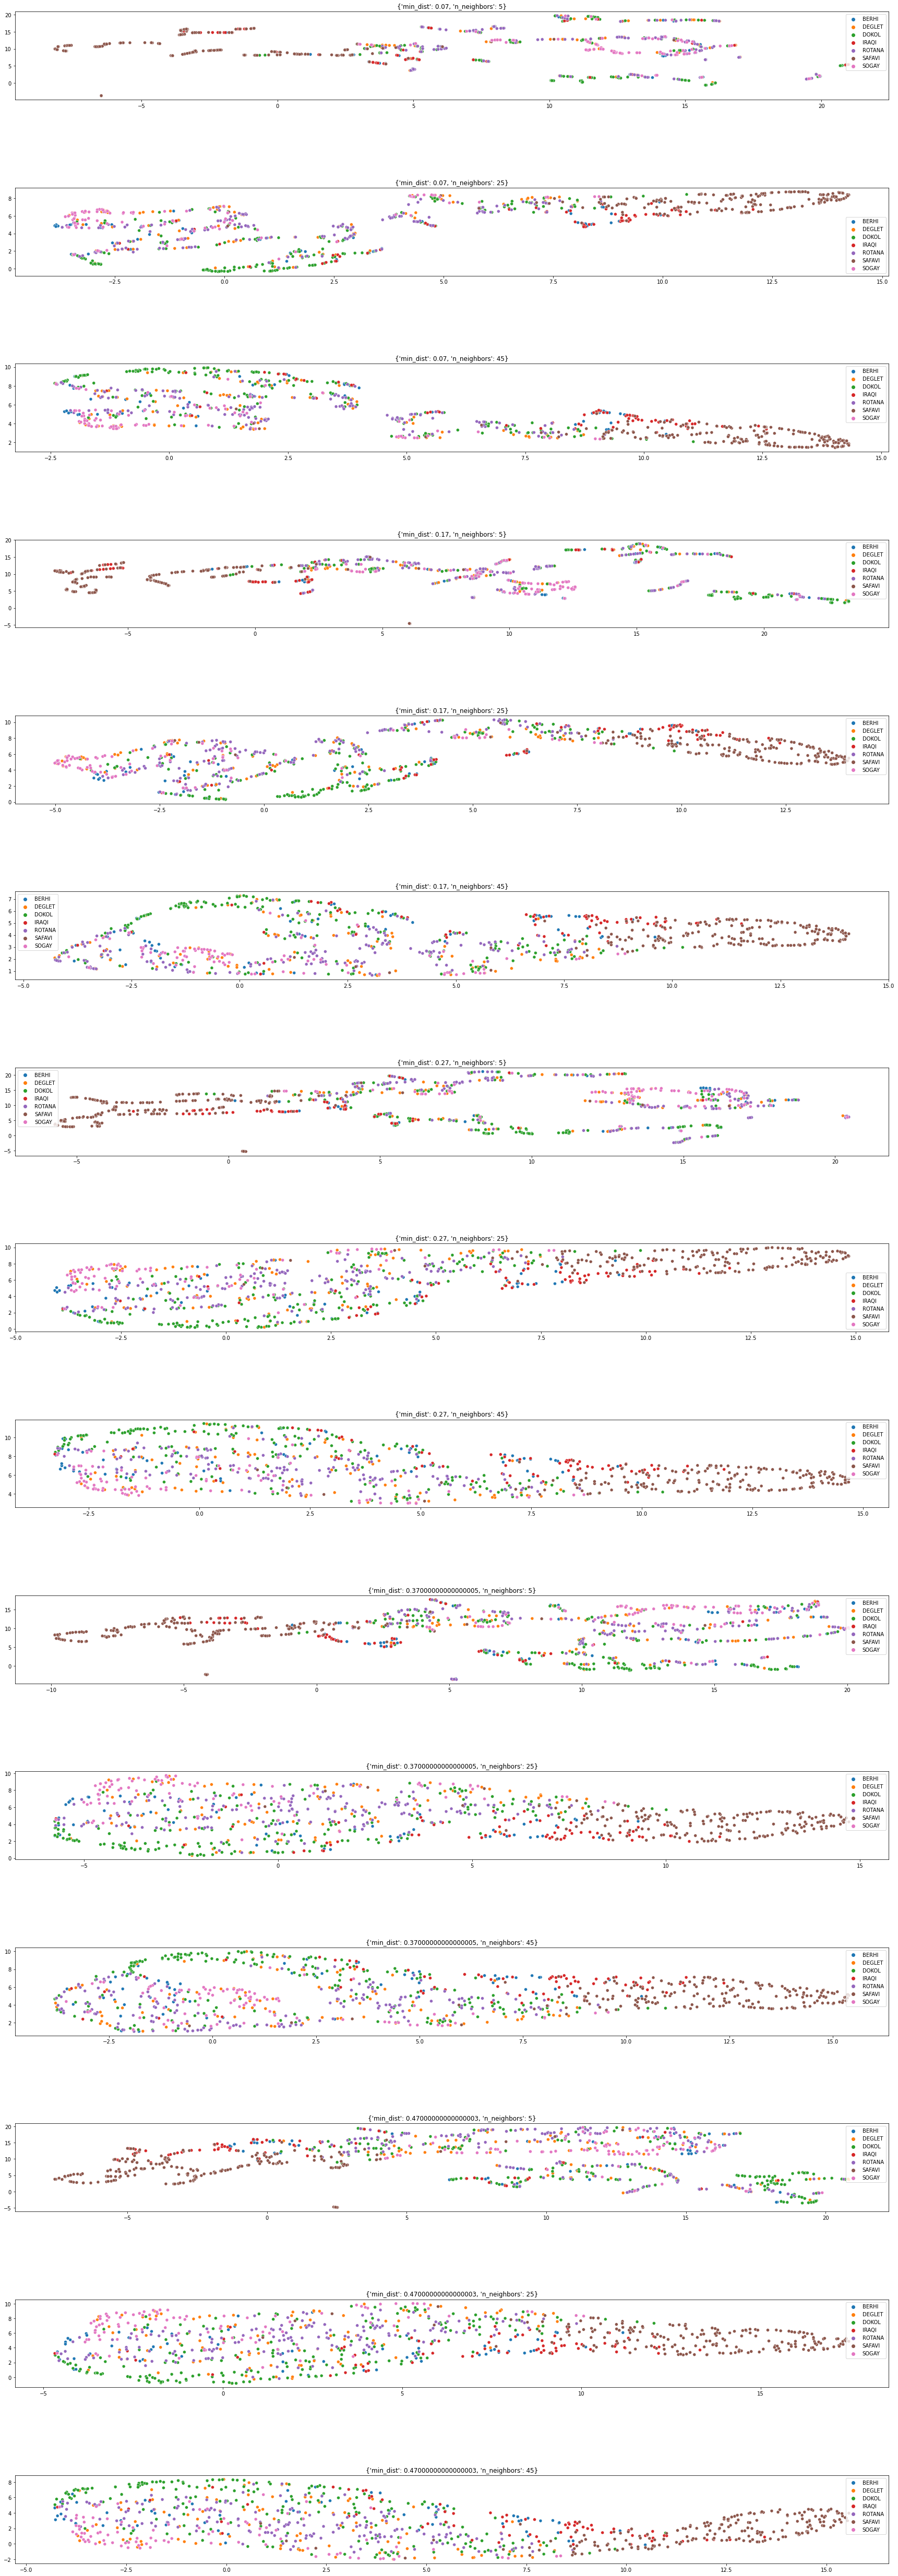

In [34]:
# UMAP

params = {'min_dist':[x for x in np.arange(0.07, 0.57, 0.1)], 'n_neighbors':[x for x in range(5,50,20)]}
altura = len(params['min_dist'] * len(params['n_neighbors']))
fig, ax = plt.subplots(altura,1,figsize=(30,6*altura))
plt.subplots_adjust(hspace = 1)
i=0
for min_dist in params['min_dist']:
    for n_neighbors in params['n_neighbors']:

        kwargs = {'min_dist': min_dist, 'n_neighbors': n_neighbors}
        umapper= umap.UMAP(n_components=2, metric='correlation', **kwargs)
        data   = umapper.fit_transform(X)
        fig = sns.scatterplot(x=data[:,0], y=data[:,1], hue=Y.values, ax=ax[i])
        ax[i].set_title(f'{kwargs}')
        i += 1

# RESPUESTA: 

### SOBRE LA MEJOR REPRESENTACION DE PCA:

Entre las visualizaciones de pca los hiper parametros probados no tuvieron diferencia alguna, por lo que en este caso me quedaria con cualquiera de las configuraciones probadas

### SOBRE LA MEJOR REPRESENTACION DE T-SNE:
A mi parecer la tsne con los hiper parametros {'perplexity': 50, 'learning_rate': 200} parece ser la mejor, la concentración de las clases y separación entre ellas parece ser la mejor entre sus otras alternativas.

### SOBRE LA MEJOR REPRESENTACION DE UMAP:
Entre las representaciones de UMAP la mejor parece ser la que tiene por hiperparámetros {'min_dist': 0.37000000000000005, 'n_neighbors': 45}, esta logra separar y agrupar las clases bastante bien. Sin embargo no me parece que ninguno de los hiperparámetros probados sea lo suficientemente bueno, no se logra un balance en el reconocimiento de la estructura global ni local que se intento dar tanto con un número bajo de vecinos como alto, además de que tampoco se logro preservar una estructura probando con distancias mínimas bajas y altas.


### Consideraciones
Todo lo mencionado es subjetivo y claramente no tiene porque cumplirse o ser valido al momento de probar un algoritmo supervisado o no supervisado, de hecho creo que la mejor forma de medir estos hiperparámetros sería ponerlos a prueba con distintos algoritmos y comparar alguna métrica como precision y recall para elegir la configuración más beneficiosa.

# Parte 3: Preguntas Reducción de dimensionalidad (1.8 Puntos)

### Pregunta 3.0 (0.2 puntos): Al momento de utilizar UMAP y t-SNE existe una gran diferencia si conocemos cuantos grupos de datos existen. Explique por qué, como minador de datos experto, es ESCENCIAL entender la diferencia entre PCA y algoritmos como t-SNE y UMAP.

Respuesta: Es importante conocer la diferencia entre estos tres algoritmos dado que todos tienen tantos sus pros como sus contras. Por ejemplo PCA no es una técnica infalible cuando nuestras componentes principales no son capaces de conservar una buena representación de la data dado una alta varianza en los datos, por otro lado, tanto t-SNE como UMAP pueden ser herramientas muy poderosas en aquellos casos que conozcamos la densidad o número de vecinos que deberían poseer los puntos de nuestros cluster, sin embargo hay que ser concientes de sus ventajas y desventajas para no caer en errores típicos, por ejemplo no dar el suficiente número de iteraciones a t-SNE para que converja a un óptimo o no darle la importancia necesaria a el número de vecinos en UMAP que condiciona que tanto se preserva una estructura local o global.

## Preguntas sobre t-SNE (1 punto):
Para responder las preguntas recomendamos apoyarte utilizando este [paper de t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf).

### Pregunta 3.1: ¿Es correcto decir que t-SNE mide distancias entre datos? Justifique su respuesta y explique el proceso. 

Respuesta: No es correcto del todo, t-SNE busca medir la similaridad entre los puntos, la cual si bien utiliza la distancia entre ellos, esta es pasada por una función Gaussiana la cual tambien toma en cuenta la densidad de puntos esperada cerca del punto mediante el parámetro de perplexity. Por lo tanto lo que se mide realmente es una métrica de similaridad que utiliza indirectamente la distancia, pero (y por ende) eso no es lo que se ve reflejado en el gráfico final.

### Pregunta 3.2: En su descripción teórica se describen dos variables de probabilidad distintas *p* y *q*. ¿Cuál es el objetivo de su definición? ¿Qué tanto afecta su relación al proceso de reducción de dimensionalidad?

Respuesta: Las probabilidades p se refieren a que tan probable que el punto Xi elija el punto Xj como su vecino, esta se puede entender como la medida de similaridad que se busca calcular entre dos puntos, por otra parte la probabilidad q es el analogo para los puntos en el plano de dimensiones reducidas. Ambas probabilidades estan muy relacionadas dado que la similaridad de dos puntos que se calcula inicialmente con la probabilidad p es la similaridad que la probabilidad q debera tratar de imitar en el nuevo plano de dimensiones reducidas para conservar la estructura del plano de mayores dimensiones.

### Pregunta 3.3: ¿Qué ventajas tiene t-SNE por sobre SNE? Mencione almenos dos

Respuesta: t-SNE utiliza la distribución t-Student en el plano de menores dimensiones lo cual le ayuda tanto a preservar mejor estructuras locales como globales (ya que asigna menor similaridad a puntos muy cercanos evitando así concentraciones de puntos producidad por la distribución normal).

## Pregunta UMAP (0.6 puntos):

### Pregunta 3.4: UMAP tiene 2 diferencias importantes con t-SNE, explique estas diferencias y mencione que implican al momento de ejecutar el argortimo.

Les recomendamos ver el siguiente [video](https://www.youtube.com/watch?v=eN0wFzBA4Sc)

Respuesta: t-SNE inicializa los puntos del plano con dimensiones reducidas en posiciones al azar por lo que puede dar resultados distintos al correr varias veces el código (a diferencia de UMAP que no cambiará el resultado al correr varias veces el código).
Por otro lado UMAP mueve menos puntos en cada iteración en comparación a t-SNE, por lo que es menos costoso para el computador y más beneficioso al trabajar con datasets muy grandes.

En resumen UMAP es menos exigente computacionalmente y es más consistente al no variar su respuesta tras el tiempo.

# Parte 4: Clustering (2 puntos)

En esta parte construirás clusters usando algoritmos conocidos y compararás precisiones:

1. Para cada pregunta, prueba reduciendo a 2 y 5 dimensiones para cada tipo de reducción de la Parte 2. (Utilzen los hiperparametros que seleccionaron como los mejores en el pu)

1. Deberás obtener el puntaje [Rand index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html) de los clusters generados.

1. Obtén la cohesión de cada cluster (SSW) y la medida inter-cluster (SSB)

1. Visualiza la clasificación del caso de 2 dimensiones




In [37]:
from sklearn.metrics import rand_score

def SSB(X, clusters):
    overall_centroid = X.mean(axis=0)
    
    SSB = 0
    clusters_labels = pd.DataFrame(clusters.labels_)[0].unique()
    for label in clusters_labels:
        cluster = X[clusters.labels_ == label]
        cluster_centroid = cluster.mean(axis=0)
        cluster_length = cluster.shape[0]       
        distance = np.linalg.norm(cluster_centroid - overall_centroid)
        
        SSB += (cluster_length * (distance**2))
    return SSB

def SSW(X, clusters):
    SSW = 0
    clusters_labels = pd.DataFrame(clusters.labels_)[0].unique()
    for label in clusters_labels:
        cluster = X[clusters.labels_ == label]
        cluster_centroid = cluster.mean(axis=0)
        resid = cluster - cluster_centroid
        SSW  += (resid**2).sum()
    return SSW

## Parte 4.1: K-means (1 punto)
Utilice k-means para obtener clusters utilizando las reducciones de dimensionalidad vistas anteriormente.


In [38]:
from sklearn.cluster import KMeans

y = Y.values.reshape((len(Y), 1))

pca_2 = PCA(n_components= 2).fit_transform(X)
pca_5 = PCA(n_components= 5).fit_transform(X)


kwargs = {'n_components': 2, 'method':'exact', 'init':'random', 'perplexity': 50, 'learning_rate': 200}
tsne_2 = TSNE(**kwargs).fit_transform(X)
kwargs['n_components'] = 5
tsne_5 =  TSNE(**kwargs).fit_transform(X)


kwargs = {'n_components': 2, 'metric':'correlation', 'min_dist': 0.37, 'n_neighbors': 45}
umap_2 = umap.UMAP(**kwargs).fit_transform(X)
kwargs['n_components'] = 5
umap_5 =  umap.UMAP(**kwargs).fit_transform(X)

In [43]:
def get_metrics_and_plot(clustering, reduced_data, y, technic, kwargs):
    y = y.flatten()
    technic = technic.upper()
    n_components = reduced_data.shape[1]
        
    clusterer = clustering(**kwargs).fit(reduced_data)

    ssb = SSB(reduced_data, clusterer)
    ssw = SSW(reduced_data, clusterer)
    r_score = rand_score(y, clusterer.labels_)
    print(pd.DataFrame(clusterer.labels_)[0].unique())
    print(" " * 4 + f"Metrics for {technic} with {n_components} components" )
    print("-" * 44)
    
    print(f'SSB score: {ssb}')
    print(f'SSW score: {ssw}')
    print(f'Rand score {r_score}')
    
    print("-" * 44)
    fig = sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusterer.labels_)
    fig.set_title(f'{technic} plot')


[1 3 6 2 4 0 5]
    Metrics for PCA with 2 components
--------------------------------------------
SSB score: 7.886273810823897e+23
SSW score: 3.93103652644698e+22
Rand score 0.8001132207581322
--------------------------------------------


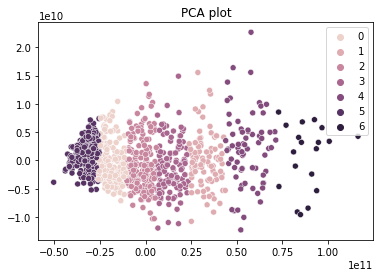

In [44]:
kwargs = {'n_clusters': 7, 'random_state': 0}
get_metrics_and_plot(KMeans, pca_2, y, 'PCA', kwargs)

[1 6 3 0 5 4 2]
    Metrics for PCA with 5 components
--------------------------------------------
SSB score: 7.887716182955073e+23
SSW score: 4.429211249763926e+22
Rand score 0.800815884673733
--------------------------------------------


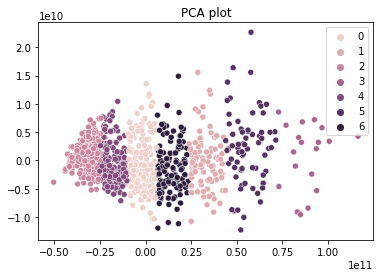

In [45]:
get_metrics_and_plot(KMeans, pca_5, y, 'PCA', kwargs)

[6 3 2 1 4 0 5]
    Metrics for T-SNE with 2 components
--------------------------------------------
SSB score: 668429.2790452027
SSW score: 24499.472534179688
Rand score 0.8046172219697929
--------------------------------------------


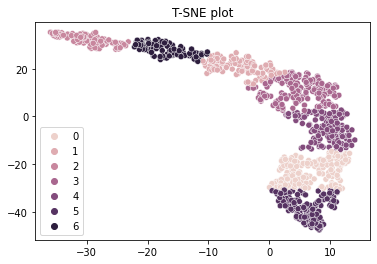

In [46]:
get_metrics_and_plot(KMeans, tsne_2, y, 'T-SNE', kwargs)

[0 6 3 1 5 2 4]
    Metrics for T-SNE with 5 components
--------------------------------------------
SSB score: 44759.07758027281
SSW score: 5635.886535644531
Rand score 0.8011212827713263
--------------------------------------------


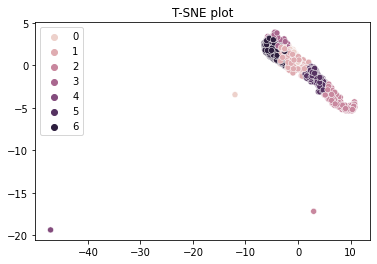

In [47]:
get_metrics_and_plot(KMeans, tsne_5, y, 'T-SNE', kwargs)

[5 4 2 0 1 6 3]
    Metrics for UMAP with 2 components
--------------------------------------------
SSB score: 27770.636374981514
SSW score: 2610.719512939453
Rand score 0.7958972372645269
--------------------------------------------


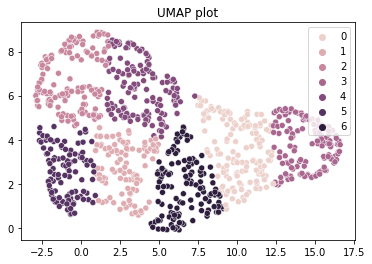

In [48]:
get_metrics_and_plot(KMeans, umap_2, y, 'UMAP', kwargs)

[5 6 2 0 1 4 3]
    Metrics for UMAP with 5 components
--------------------------------------------
SSB score: 20104.950751215198
SSW score: 2613.066131591797
Rand score 0.7970070986435855
--------------------------------------------


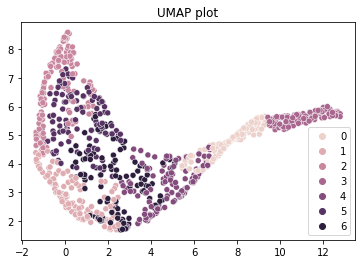

In [49]:
get_metrics_and_plot(KMeans, umap_5, y, 'UMAP', kwargs)

## Parte 4.2: DBSCAN (1 punto)

Utilice DBSCAN para cada uno de los datos a los que se les aplicó reducción de dimensiones.

[-1]
    Metrics for PCA with 2 components
--------------------------------------------
SSB score: 0.0
SSW score: 8.279377463468593e+23
Rand score 0.16849533088518273
--------------------------------------------


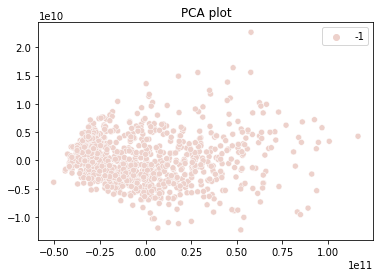

In [50]:
from sklearn.cluster import DBSCAN


kwargs = {'eps': .5, 'min_samples': 5}

get_metrics_and_plot(DBSCAN, pca_2, y, 'PCA', kwargs)

[-1]
    Metrics for PCA with 5 components
--------------------------------------------
SSB score: 0.0
SSW score: 8.330637307931463e+23
Rand score 0.16849533088518273
--------------------------------------------


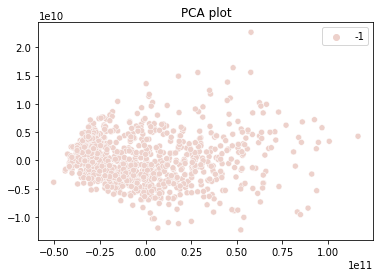

In [51]:
get_metrics_and_plot(DBSCAN, pca_5, y, 'PCA', kwargs)

[-1]
    Metrics for T-SNE with 2 components
--------------------------------------------
SSB score: 0.0
SSW score: 692928.75
Rand score 0.16849533088518273
--------------------------------------------


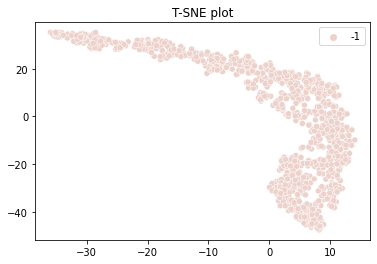

In [52]:
get_metrics_and_plot(DBSCAN, tsne_2, y, 'T-SNE', kwargs)

[-1  2  0  1 26  5 19  3 25  4 14  6 13 37 36  7  8  9 10 11 17 12 15 16
 18 20 21 22 23 24 27 28 29 33 34 31 30 35 32]
    Metrics for T-SNE with 5 components
--------------------------------------------
SSB score: 21627.36736876874
SSW score: 28767.593783155084
Rand score 0.5449717320541374
--------------------------------------------


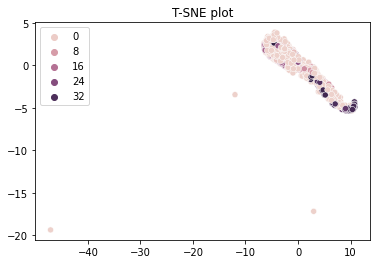

In [53]:
get_metrics_and_plot(DBSCAN, tsne_5, y, 'T-SNE', kwargs)

[-1  0  1  2  3  4  5  6]
    Metrics for UMAP with 2 components
--------------------------------------------
SSB score: 23913.66817145586
SSW score: 6467.690522432327
Rand score 0.7243546292640899
--------------------------------------------


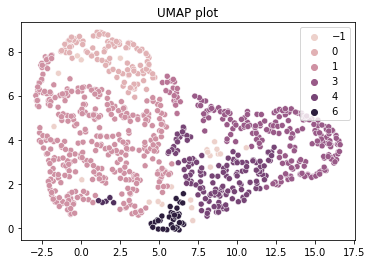

In [54]:
get_metrics_and_plot(DBSCAN, umap_2, y, 'UMAP', kwargs)

[-1  0  1  2  3  4  5  6  7  8]
    Metrics for UMAP with 5 components
--------------------------------------------
SSB score: 17568.505686047825
SSW score: 5149.520941734314
Rand score 0.7648087040940725
--------------------------------------------


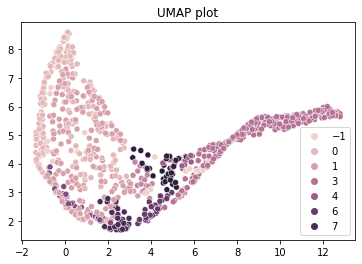

In [55]:
get_metrics_and_plot(DBSCAN, umap_5, y, 'UMAP', kwargs)

# Parte 5: Visualización (0.2 puntos)
Visualize el top 3 de clasificaciones en 2 dimensiones. Argumente en que se basó para definir que eran los mejores. 






[5 4 2 0 1 6 3]
    Metrics for UMAP with 2 components
--------------------------------------------
SSB score: 27770.636374981514
SSW score: 2610.719512939453
Rand score 0.7958972372645269
--------------------------------------------


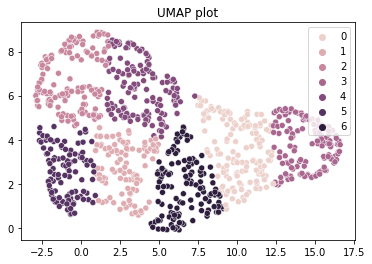

In [56]:
kwargs = {'n_clusters': 7, 'random_state': 0}
get_metrics_and_plot(KMeans, umap_2, y, 'UMAP', kwargs)

[5 6 2 0 1 4 3]
    Metrics for UMAP with 5 components
--------------------------------------------
SSB score: 20104.950751215198
SSW score: 2613.066131591797
Rand score 0.7970070986435855
--------------------------------------------


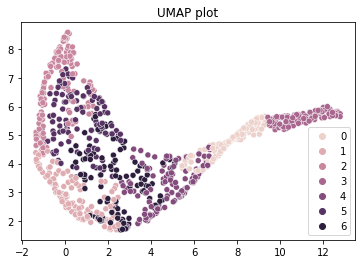

In [57]:
get_metrics_and_plot(KMeans, umap_5, y, 'UMAP', kwargs)

[-1  0  1  2  3  4  5  6  7  8]
    Metrics for UMAP with 5 components
--------------------------------------------
SSB score: 17568.505686047825
SSW score: 5149.520941734314
Rand score 0.7648087040940725
--------------------------------------------


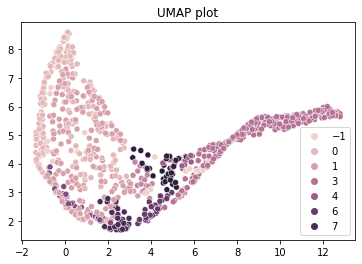

In [58]:
kwargs = {'eps': .5, 'min_samples': 5}
get_metrics_and_plot(DBSCAN, umap_5, y, 'UMAP', kwargs)

Respuesta: Para mi elección me base un poco en los scores y no deje sesgar mi elección por las visualizaciones iniciales que obtuvimos al inicio de la tarea (dado que si estamos aplicando métodos no supervisados no sería realista compararlo con el data etiquetado correctamente), entre los puntajes obtenidos estos son los más "balanceados", sin embargo, quedo un poco insatisfecho con la última visualizacion, dado que el número de clusters formados no coincide con el esperado (deberian ser 7 y obtuve 8), por otro lado las primeras dos visualizaciones las elegi porque a priori no parecen sufrir tanto por centroides y geometría a diferencia de otras visualizaciones que tambien utilizan KMeans.

# Parte 6: Preguntas Clustering: (0.5 puntos)

### Pregunta 6.1:

¿Cuál es la mejor combinación para este dataset? ¿Por qué podría haberse dado esto?

Respuesta: UMAP utilizando KMeans me parece la elección más acertada en base a los resultados que obtuve, parecen complementarse decentemente en este problema.
### Pregunta 6.2:

Mencione tres diferencias entre K-means y DBSCAN.

Respuesta: 

1. Kmeans permite elegir cantidad de clusters a formar mientras que DBScan no. 

2. DBScan forma cluster por densidad de puntos mientras que Kmeans por centroides.

3. DBScan maneja bien outliers mientras que KMeans no.

# Bonus
Esta tarea cuenta con un bonus al que podrás optar. Cabe recalcar que para optar a este beneficio la nota de tu tarea (sin bonus) debe ser igual o superior a 3,95 (sin considerar posibles descuentos).

## Meme (hasta 2 décimas)

Haga un meme relacionado a la material del curso. Se dará el bonus a los **10 mejores** memes de la sección. (evaluado por el consejo de ayudantes).

Aquí ta mi meme

https://youtu.be/41xW_sBMIxA